# The Sparks Foundation

# Data Science and Business Analytics Tasks

# Task 1: Prediction using Supervised ML

# By Ishita Nag

[Machine Learning is a branch of Artificial Intelligence (AI) which deals with the study of computer algorithms that improve automatically through experience and by the use of data. In this task, Supervised ML is implemented in which labelled data is used to derive a mapping function between the input variables and output variable. During training, the algorithm will search for patterns in the data that correlate with the desired outputs. After training, a supervised learning algorithm takes in the new inputs and predicts the correct label based on the prior training data.] 

In [1]:
#importing the different libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reading data from the given dataset
url = "http://bit.ly/w-data"
scores = pd.read_csv(url)
print("Data imported successfully")
#printing the first 5 entries of the dataset
scores.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
#printing the last 5 entries of the dataset
scores.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [4]:
#provides all the information of the dataset
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
#prints the number of rows and columns
scores.shape

(25, 2)

In [6]:
#displays statistical information about the dataset
scores.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


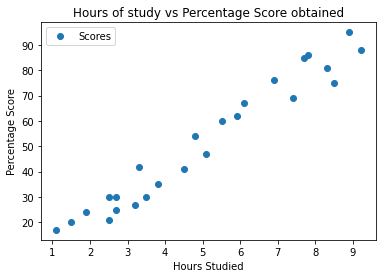

In [7]:
#Plotting a 2-D graph to show the distribution of scores
scores.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours of study vs Percentage Score obtained')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

The above graph clearly depicts that the variables are correlated and that there is a positive correlation between the number of hours studied and percentage of score and we can calculate the Pearson's correlation coefficient to show this relation.

In [8]:
#calculation of Pearson's correlation coefficient
scores.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [9]:
#in order to prepare the data, the data is divided into attributes i.e., inputs and labels i.e., outputs.
X = scores.iloc[:, :-1].values
y = scores.iloc[:, 1].values

In [10]:
#using Scikit-Learn's built-in train_test_split method, the data is split into training and test sets.
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

In [11]:
#training the data
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training completed.")

Training completed.


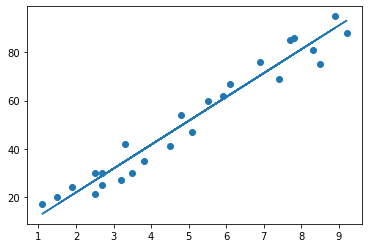

In [12]:
# plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [13]:
# making the predictions
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [14]:
#comparing Actual vs. Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


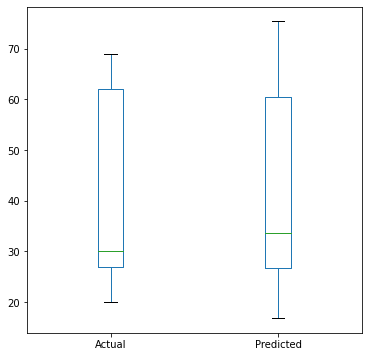

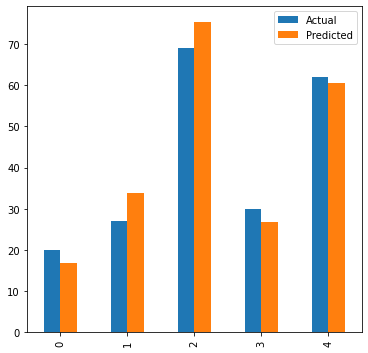

In [15]:
# box plot and bar plot to show the difference between actual data and predicted data
df.plot(kind="box", figsize=(6,6))
plt.show()
df.plot(kind="bar", figsize=(6,6))
plt.show()

In [16]:
# Testing the model with your own data
hours = [[9.25]]
pred = regressor.predict(hours)
print("No of Hours = {}".format(hours[0][0]))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


In [17]:
from sklearn import metrics  
print('Mean Absolute Error =', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error =', metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error = 4.183859899002975
Mean Squared Error = 21.5987693072174
